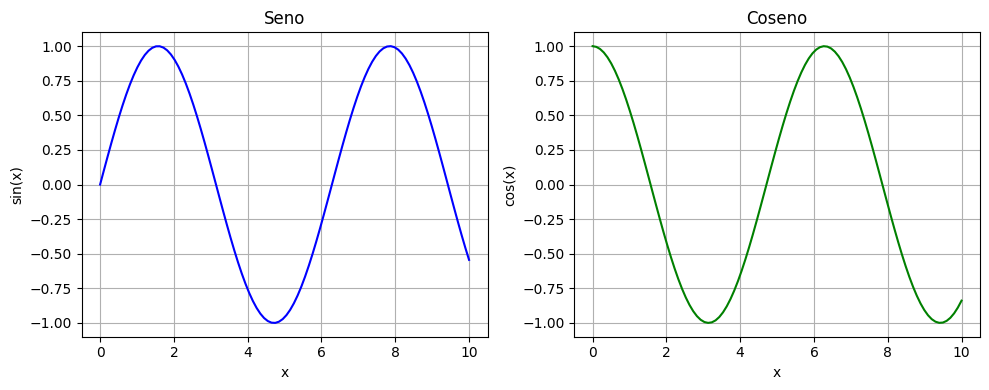

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from setuptools.command.rotate import rotate

# Creiamo i dati
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Creiamo due sottografi (subplots) su una riga, 2 colonne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 riga, 2 colonne

# Primo grafico: sinusoide
ax1.plot(x, y1, color='blue')
ax1.set_title("Seno")
ax1.set_xlabel("x")
ax1.set_ylabel("sin(x)")
ax1.grid(True)

# Secondo grafico: cosinusoide
ax2.plot(x, y2, color='green')
ax2.set_title("Coseno")
ax2.set_xlabel("x")
ax2.set_ylabel("cos(x)")
ax2.grid(True)

plt.tight_layout()  # Sistema bene gli spazi tra i grafici
plt.show()


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [95]:
df["tip"].min()

np.float64(1.0)

In [96]:
df["tip"].max()

np.float64(10.0)

In [104]:
df_filter = df[(df["tip"] > 2) & (df["tip"] < 4)]
df_filter["tip"].value_counts().sum()

np.int64(113)

In [93]:
df["tip"].value_counts()

tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

<Axes: >

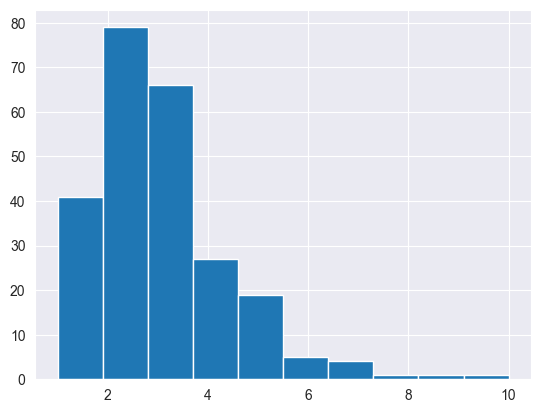

In [94]:

df["tip"].hist()

In [12]:
df["total_bill"].mean()


np.float64(19.78594262295082)

In [13]:
df["total_bill"].median()


np.float64(17.795)

In [14]:
df["total_bill"].mode()

0    13.42
Name: total_bill, dtype: float64

In [15]:
df["total_bill"].min()

np.float64(3.07)

In [16]:
df["total_bill"].max()

np.float64(50.81)

In [17]:
df["total_bill"].max() - df["total_bill"].min()

np.float64(47.74)

In [18]:
df["total_bill"].std()

np.float64(8.902411954856856)

In [19]:
df["total_bill"].var()

np.float64(79.25293861397827)

In [21]:
q_25 = df["total_bill"].quantile(0.25)
q_50 = df["total_bill"].quantile(0.50)
q_75 = df["total_bill"].quantile(0.75)

iqr = q_75 - q_25

df["iqr"] = iqr
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,iqr
0,16.99,1.01,Female,No,Sun,Dinner,2,10.78
1,10.34,1.66,Male,No,Sun,Dinner,3,10.78
2,21.01,3.50,Male,No,Sun,Dinner,3,10.78
3,23.68,3.31,Male,No,Sun,Dinner,2,10.78
4,24.59,3.61,Female,No,Sun,Dinner,4,10.78
5,25.29,4.71,Male,No,Sun,Dinner,4,10.78
6,8.77,2.00,Male,No,Sun,Dinner,2,10.78
7,26.88,3.12,Male,No,Sun,Dinner,4,10.78
8,15.04,1.96,Male,No,Sun,Dinner,2,10.78
9,14.78,3.23,Male,No,Sun,Dinner,2,10.78


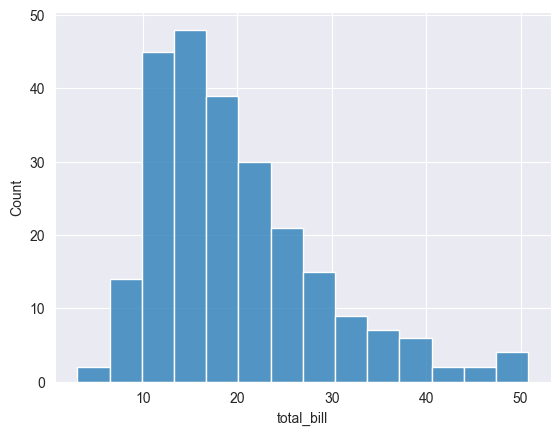

In [22]:
sns.histplot(df["total_bill"])
plt.show()

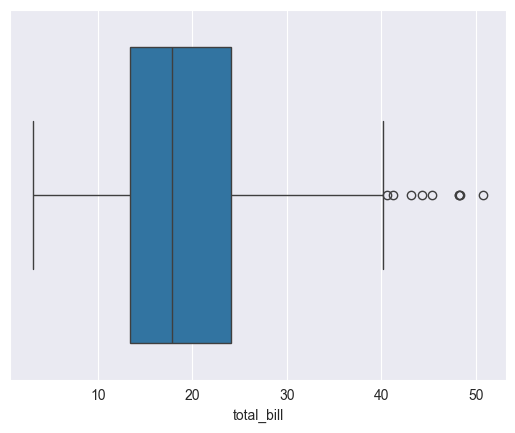

In [23]:
sns.boxplot(x=df["total_bill"])
plt.show()

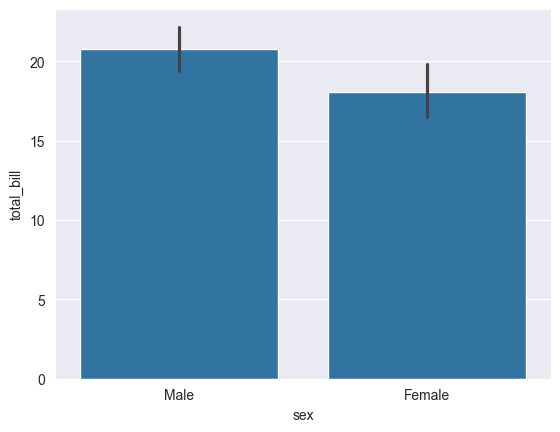

In [32]:
sns.barplot(x=df["sex"], y=df["total_bill"])
plt.show()

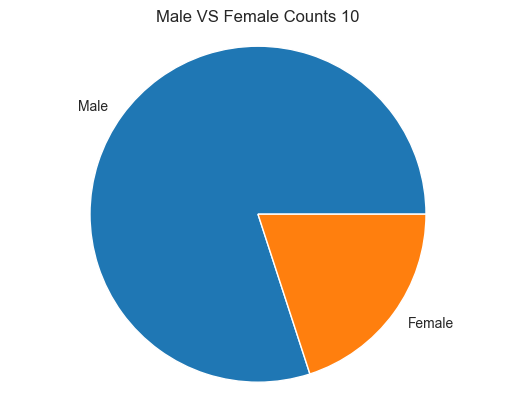

In [45]:
# df["sex_code"] = df["sex"].map({"male": 1, "female": 0})
df["sex_code"] = df["sex"].apply(lambda x: 0 if x == "Female" else 1)
conteggio = df["sex_code"].head(10).value_counts()
plt.pie(conteggio, labels=["Male", "Female"])
plt.title("Male VS Female Counts 10")
plt.axis('equal')
plt.show()

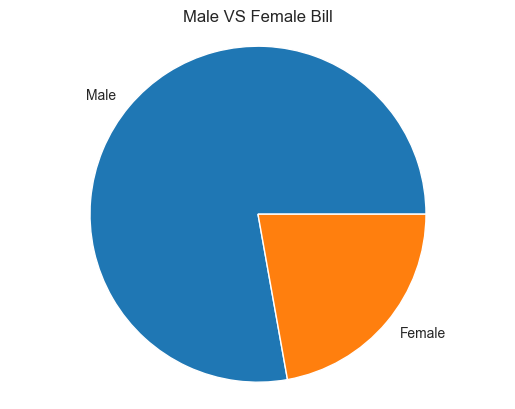

In [49]:
df_10 = df.head(10)
bill_for_sex = df_10.groupby("sex_code", observed=True)["total_bill"].sum()
plt.pie(bill_for_sex, labels=["Male", "Female"])
plt.title("Male VS Female Bill")
plt.axis('equal')
plt.show()

In [50]:
df['total_bill'].skew()

np.float64(1.1332130376158205)

In [51]:
df['total_bill'].kurt()

np.float64(1.2184840156638854)

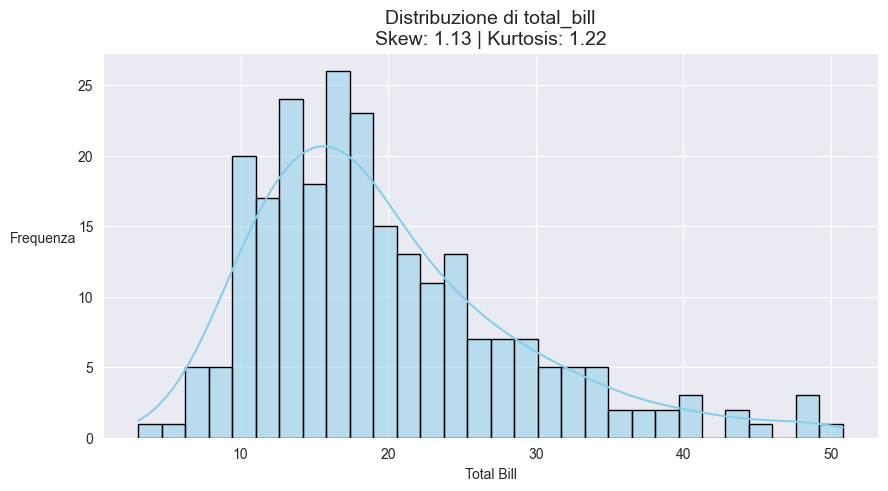

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot(df["total_bill"], kde=True, bins=30, color='skyblue', edgecolor='black')

asimmetria = df["total_bill"].skew()
curtosi = df["total_bill"].kurt()

# Titolo e annotazioni
plt.title(f"Distribuzione di total_bill\nSkew: {asimmetria:.2f} | Kurtosis: {curtosi:.2f}", fontsize=14)
plt.xlabel("Total Bill")
plt.ylabel("Frequenza", rotation=0, labelpad=25)

plt.grid(True)
plt.show()
plt.show()

In [61]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,iqr,sex_code
0,16.99,1.01,Female,No,Sun,Dinner,2,10.78,0
1,10.34,1.66,Male,No,Sun,Dinner,3,10.78,1
2,21.01,3.50,Male,No,Sun,Dinner,3,10.78,1
3,23.68,3.31,Male,No,Sun,Dinner,2,10.78,1
4,24.59,3.61,Female,No,Sun,Dinner,4,10.78,0
5,25.29,4.71,Male,No,Sun,Dinner,4,10.78,1
6,8.77,2.00,Male,No,Sun,Dinner,2,10.78,1
7,26.88,3.12,Male,No,Sun,Dinner,4,10.78,1
8,15.04,1.96,Male,No,Sun,Dinner,2,10.78,1
9,14.78,3.23,Male,No,Sun,Dinner,2,10.78,1


In [62]:
df["tip"].mean()


np.float64(2.99827868852459)

<Axes: >

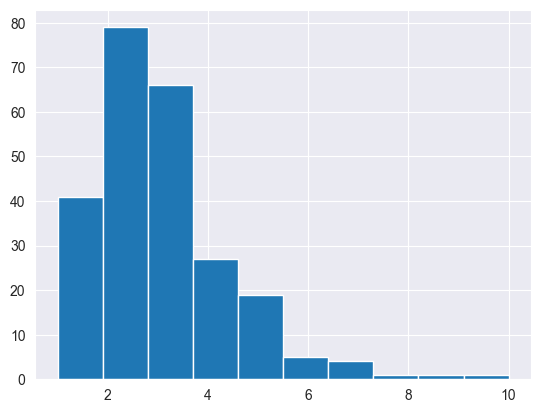

In [63]:
df["tip"].hist()

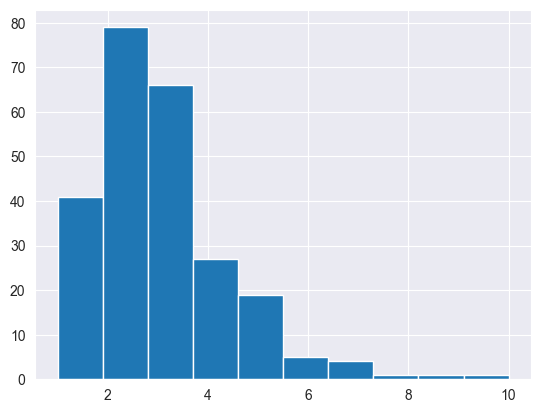

In [66]:
plt.hist(x=df["tip"])
plt.show()

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'tip'}>, <Axes: >]], dtype=object)

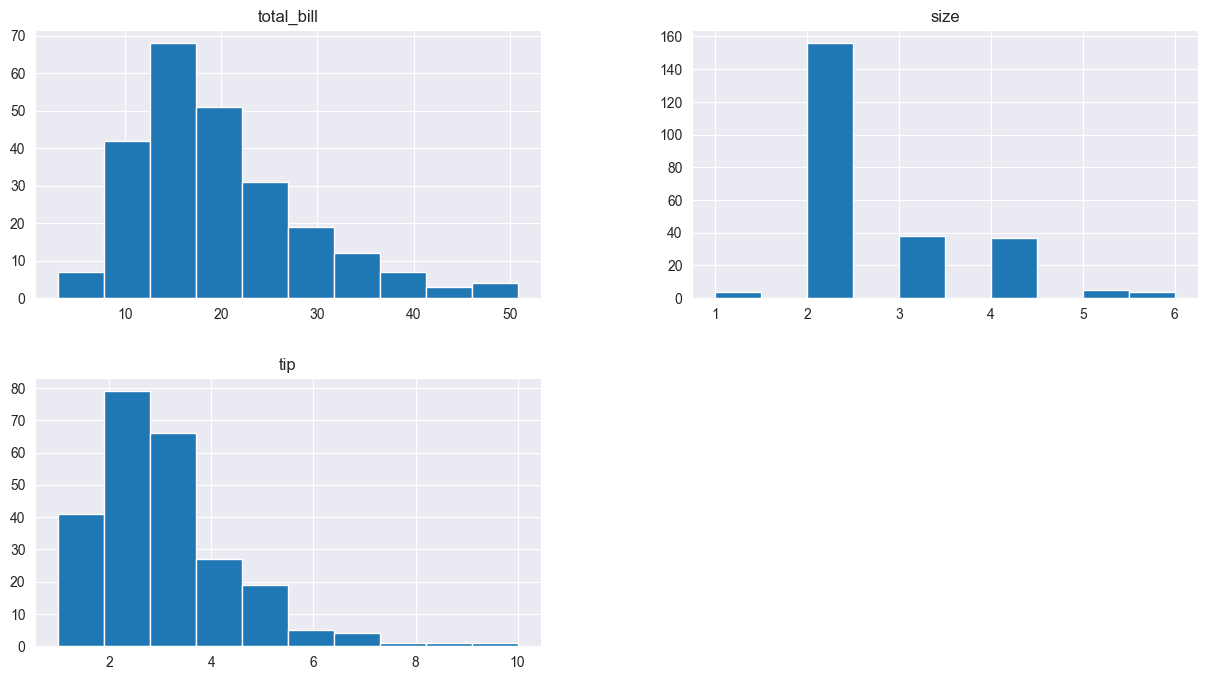

In [72]:
histograms_columns = ['total_bill',  'size', 'tip']
df[histograms_columns].hist(figsize=(15, 8))

In [110]:
prob_tip_sab = df[(df['day'] == 'Sat') & (df['tip'] > 5)]
prob_tip_sab

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
211,25.89,5.16,Male,Yes,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [115]:
prob_tip_sab = df[(df['day'] == 'Sat') & (df['tip'] > 5)].shape[0] / df[df['day'] == 'Sat'].shape[0]
prob_tip_sab * 100

8.045977011494253

Text(0.5, 1.0, 'Relazione tra totale e mancia')

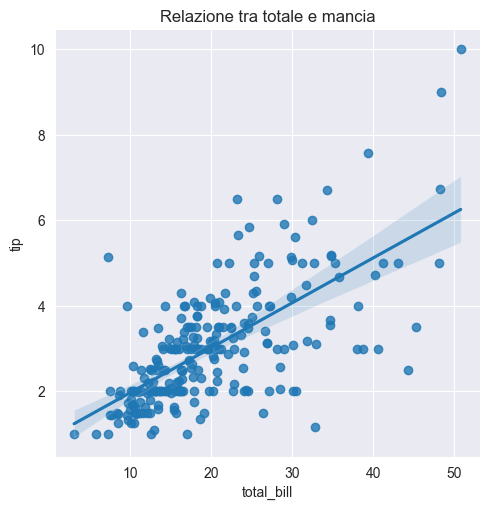

In [118]:
sns.lmplot(x='total_bill', y='tip', data=df)
plt.title("Relazione tra totale e mancia")

In [119]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [120]:
# calcola la probabilita che un cliente sia fumatore
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [124]:
df["smoker"].value_counts().sum()

np.int64(244)

In [129]:
# normalize = True trasforma il numero assoluto in frazione nel nostro caso 93 diventa 0.38
percent_smocker = df["smoker"].value_counts(normalize=True) * 100
percent_smocker

smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64

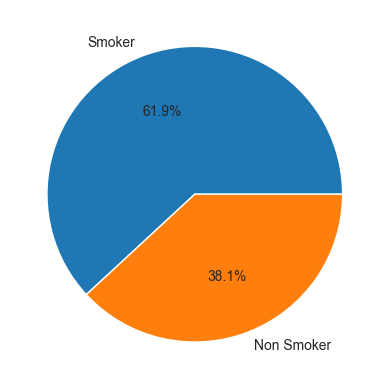

In [131]:
plt.pie(percent_smocker, labels=["Smoker", "Non Smoker"], autopct="%1.1f%%")
plt.show()

In [132]:
# calcola la probabilita che un cliente dia una mancia > 5 (in generale e il sabato)
df["tip"].value_counts()

tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

In [175]:
# se metti mean * 100 ti da la percentuale perche true = 1 e false = 0 percio la media e' la percentuale di true
tip_upperthenfive_all = (df["tip"] > 5).mean() * 100
# tip_upperthenfive_all.value_counts(normalize=True) * 100
tip_upperthenfive_all

np.float64(7.377049180327869)

In [170]:
# shape = tupla(numero righe, numero colonne)
# shape[0] = numero righe
percent_tip_upperthenfive_sat = df[(df["tip"] > 5) & (df["day"] == "Sat")].shape[0] / df[df["day"] == "Sat"].shape[0] * 100
percent_tip_upperthenfive_sat

8.045977011494253

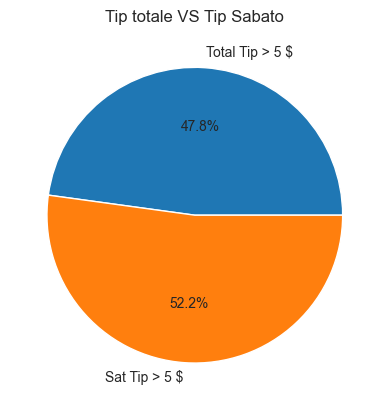

In [178]:
sizes = [tip_upperthenfive_all, percent_tip_upperthenfive_sat]
plt.pie(sizes, labels=["Total Tip > 5 $", "Sat Tip > 5 $"], autopct="%1.1f%%")
plt.title("Tip totale VS Tip Sabato")
plt.show()

In [197]:
# Fai un t-test confronto delle mance tra uomini e donne

# cosi ottengo le percentuali delle mance date dagli uomini in base alle mance
man = df[(df["sex"] == "Male")]["tip"].value_counts(normalize=True) * 100
man



tip
2.00    14.012739
3.00    10.191083
4.00     5.732484
5.00     3.821656
1.50     3.184713
          ...    
1.47     0.636943
1.00     0.636943
1.17     0.636943
5.92     0.636943
1.75     0.636943
Name: proportion, Length: 90, dtype: float64

In [198]:
# cosi ottengo le percentuali delle mance date dalle donne in base alle mance
female = df[(df["sex"] == "Female")]["tip"].value_counts(normalize=True) * 100
female

tip
2.00    12.643678
3.00     8.045977
3.50     5.747126
2.50     5.747126
5.00     4.597701
1.50     4.597701
4.00     3.448276
1.00     3.448276
2.23     2.298851
3.25     2.298851
2.75     2.298851
3.48     2.298851
2.45     1.149425
3.02     1.149425
3.61     1.149425
1.01     1.149425
1.67     1.149425
3.14     1.149425
2.47     1.149425
2.60     1.149425
5.20     1.149425
3.07     1.149425
5.17     1.149425
4.30     1.149425
2.20     1.149425
4.08     1.149425
1.83     1.149425
2.92     1.149425
1.80     1.149425
1.68     1.149425
2.52     1.149425
4.20     1.149425
2.83     1.149425
1.25     1.149425
2.30     1.149425
1.36     1.149425
1.63     1.149425
5.14     1.149425
3.75     1.149425
2.61     1.149425
1.61     1.149425
4.19     1.149425
2.01     1.149425
3.23     1.149425
6.50     1.149425
1.10     1.149425
3.09     1.149425
2.88     1.149425
4.67     1.149425
Name: proportion, dtype: float64

In [224]:
# unisco i due dataframe in uno solo con pd.concat
percent_tip_df = pd.concat([man, female], axis=1, keys=["man", "female"])
percent_tip_df.head(20)

,man,female
tip,,
2.00,14.012739,12.643678
3.00,10.191083,8.045977
4.00,5.732484,3.448276
5.00,3.821656,4.597701
1.50,3.184713,4.597701
2.50,3.184713,5.747126
3.50,2.547771,5.747126
2.24,1.273885,NaN
2.31,1.273885,NaN


In [213]:
percent_tip_df.isnull()


,man,female
tip,,
2.00,False,False
3.00,False,False
4.00,False,False
5.00,False,False
1.50,False,False
...,...,...
4.19,True,False
1.10,True,False
3.09,True,False


In [234]:
# cosi sostituisci i valori nulli con 0
percent_tip_df = percent_tip_df.fillna(0)
# cosi elimina i valori nulli ma non ha funzionato
# percent_tip_df = percent_tip_df.dropna(subset = ["man", "female"])
percent_tip_df.isnull().sum()

man       0
female    0
dtype: int64

In [231]:
percent_tip_df

,man,female
tip,,
2.00,14.012739,12.643678
3.00,10.191083,8.045977
4.00,5.732484,3.448276
5.00,3.821656,4.597701
1.50,3.184713,4.597701
2.50,3.184713,5.747126
3.50,2.547771,5.747126
1.25,1.273885,1.149425
3.23,0.636943,1.149425


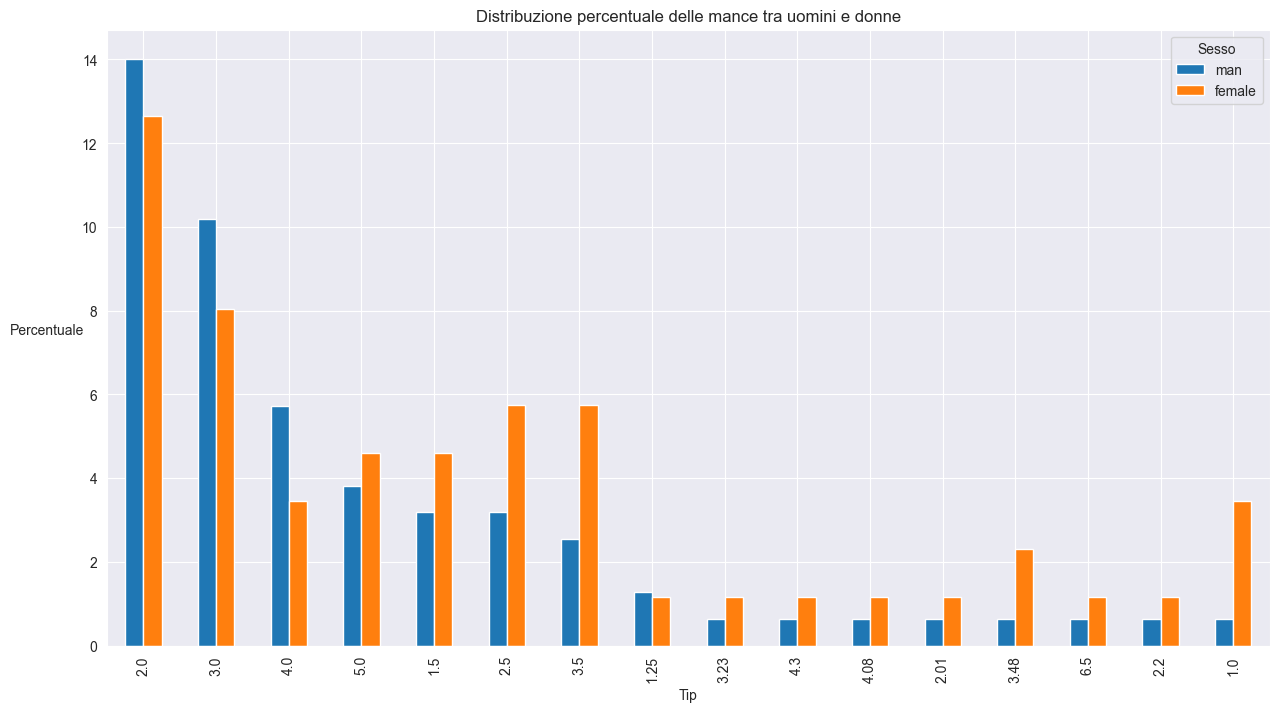

In [235]:
percent_tip_df.plot(kind="bar", figsize=(15, 8))
plt.title("Distribuzione percentuale delle mance tra uomini e donne")
plt.xlabel("Tip")
plt.ylabel("Percentuale", rotation=0, labelpad=25)
plt.legend(title="Sesso")
plt.show()